<a href="https://colab.research.google.com/github/VishalPrem1994/AIGenPlayGround/blob/main/CivitAiModelToSDDiffuser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install openai numpy opencv-python accelerate transformers ftfy bitsandbytes==0.35.0 gradio natsort safetensors xformers diffusers omegaconf requests


  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4707 sha256=3a4eab6f9bf5f85ed97120026cc90219cce5fa82107d1109a8591ed7ba83f299
  Stored in directory: /root/.cache/pip/wheels/91/e2/96/f676aa08bfd789328c6576cd0f1fde4a3d686703bb0c247697
Successfully built antlr4-python3-runtime ffmpy


In [2]:
!wget -q https://github.com/VishalPrem1994/diffusers/raw/main/scripts/convert_original_stable_diffusion_to_diffusers.py


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [13]:
import requests
def downloadCivitAi(civitUrl,locationForTensor):
  url = civitUrl
  r = requests.get(url, allow_redirects=True)

  open('/content/drive/MyDrive/stable_diffusion_weights/'+locationForDiffuser, 'wb').write(r.content)
  


In [ ]:
downloadCivitAi("https://civitai.com/api/download/models/29460","Mark3/realistic.safetensors")

In [ ]:
!python /content/convert_original_stable_diffusion_to_diffusers.py \
--from_safetensors \
--checkpoint_path "/content/drive/MyDrive/stable_diffusion_weights/Mark3/realistic.safetensors" \
--dump_path "/content/drive/MyDrive/stable_diffusion_weights/Mark3" --device='cuda:0'

2023-04-25 18:03:22.579361: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
global_step key not found in model
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.4.self_attn.out_proj.weight', 'vision_model.encoder.layers.15.mlp.fc2.bias', 'vision_model.encoder.layers.23.self_attn.k_proj.bias', 'vision_model.encoder.layers.21.mlp.fc2.bias', 'vision_model.encoder.layers.20.self_attn.k_proj.weight', 'vision_model.encoder.layers.13.mlp.fc2.bias', 'vision_model.encoder.layers.2.self_attn.out_proj.bias', 'vision_model.encoder.layers.10.mlp.fc2.bias', 'vision_model.encoder.layers.14.layer_norm1.bias', 'vision_model.encoder.layers.19.self_attn.out_proj.bias', 'vision_model.encoder.layers.17.layer_norm2.bias', 'vision_model.encoder.layers.17.mlp.fc2.weight', 'vision_model.encoder.layers.23.self_attn.out_proj.weight', 'vision_model.encoder.layers.19.laye

In [ ]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline, DDIMScheduler
from IPython.display import display

model_path = "/content/drive/MyDrive/stable_diffusion_weights/Mark3"             # If you want to use previously trained model saved in gdrive, replace this with the full path of model in gdrive
torch.cuda.empty_cache()
pipe = StableDiffusionPipeline.from_pretrained(model_path, safety_checker=None, torch_dtype=torch.float16).to("cuda")
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe.enable_xformers_memory_efficient_attention()

/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/50 [00:00<?, ?it/s]

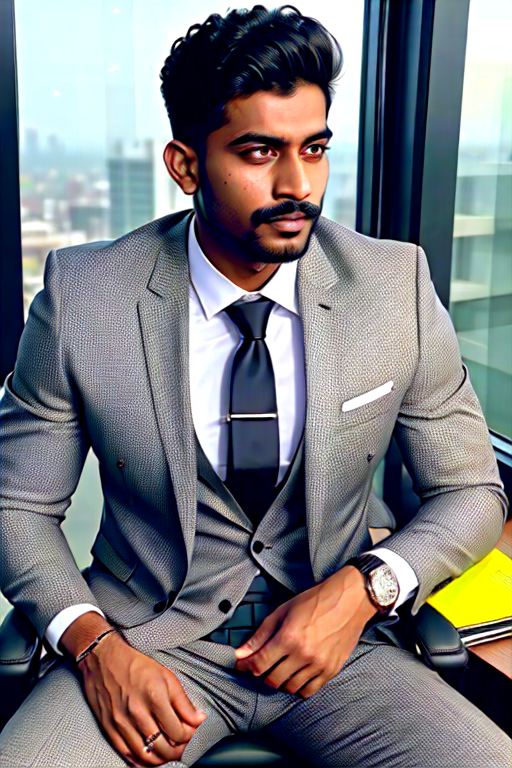

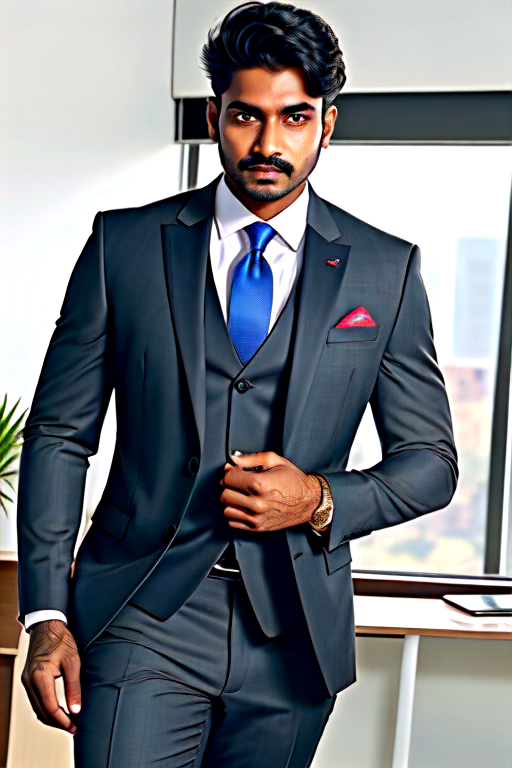

In [ ]:
g_cuda = torch.Generator(device='cuda')
seed = 4248775099 #@param {type:"number"}
g_cuda.manual_seed(seed)
#@title Run for generating images.

prompt = "indian man in an office wearing a suit, high quality, intricate, ultra realistic" #@param {type:"string"}
negative_prompt = "(worst quality:1.4), (low quality:1.4), child, deformed, deformed face, bad hands, bad fingers, bad hands, (3d, render, cgi, doll, painting:1.4), long body, blurry, duplicate, cloned, duplicate body parts, disfigured, extra limbs, fused fingers, extra fingers, twisted, malformed hands, mutated hands and fingers, conjoined, missing limbs, bad anatomy, bad proportions, logo, signature, text, words, lowres, boring, mutated, artifacts, gross, ugly, stretch, smooth skin texture" #@param {type:"string"}
num_samples = 2 #@param {type:"number"}
guidance_scale = 8 #@param {type:"number"}
num_inference_steps = 50 #@param {type:"number"}
height = 768 #@param {type:"number"}
width = 512 #@param {type:"number"}

with autocast("cuda"), torch.inference_mode():
    images = pipe(
        prompt,
        height=height,
        width=width,
        negative_prompt=negative_prompt,
        num_images_per_prompt=num_samples,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        generator=g_cuda
    ).images

for img in images:
    display(img)